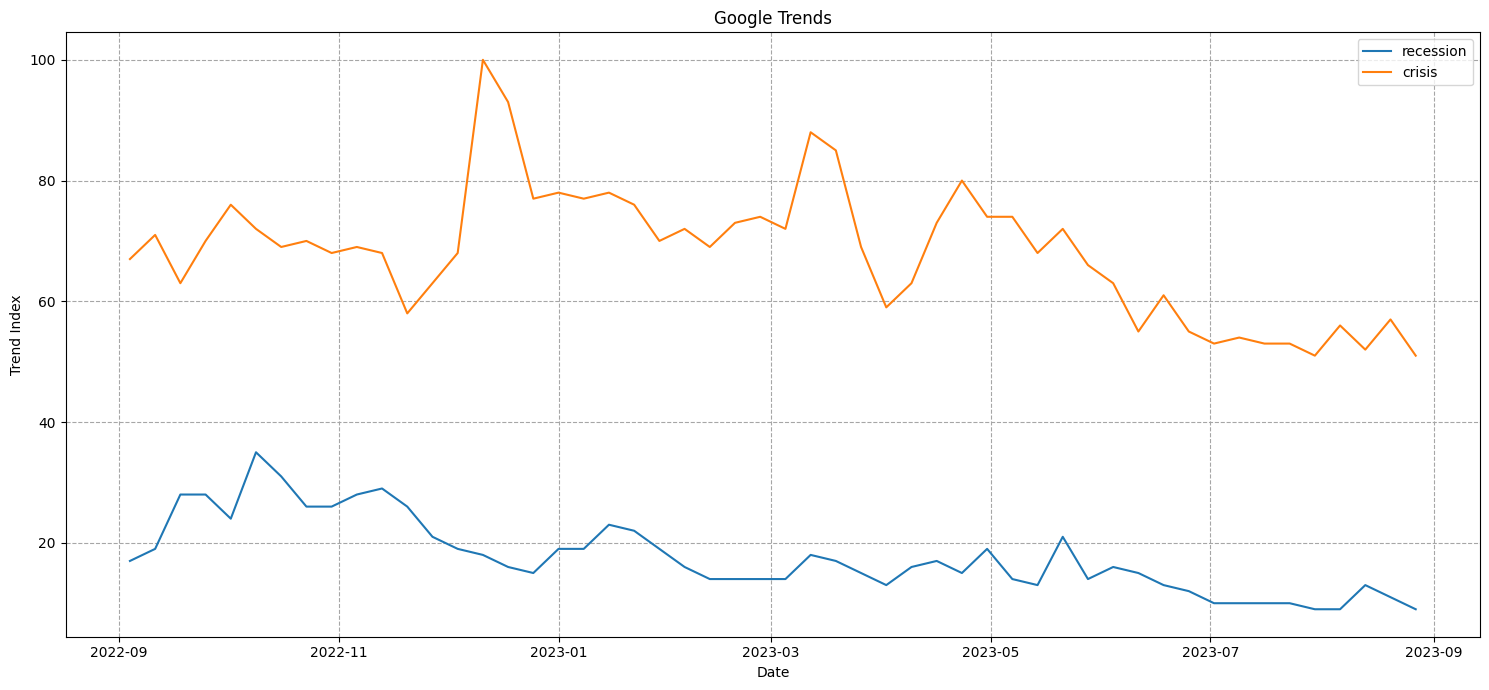

            recession  crisis  isPartial
date                                    
2022-09-04         17      67      False
2022-09-11         19      71      False
2022-09-18         28      63      False
2022-09-25         28      70      False
2022-10-02         24      76      False
2022-10-09         35      72      False
2022-10-16         31      69      False
2022-10-23         26      70      False
2022-10-30         26      68      False
2022-11-06         28      69      False
2022-11-13         29      68      False
2022-11-20         26      58      False
2022-11-27         21      63      False
2022-12-04         19      68      False
2022-12-11         18     100      False
2022-12-18         16      93      False
2022-12-25         15      77      False
2023-01-01         19      78      False
2023-01-08         19      77      False
2023-01-15         23      78      False
2023-01-22         22      76      False
2023-01-29         19      70      False
2023-02-05      

In [13]:
import pytrends as pt
from pytrends.request import TrendReq
import matplotlib.pyplot as plt

# Initialize the Google Trends object
pytrends = TrendReq()

# Set the keywords to search for
keywords = ["recession", "crisis"]

# Set the timeframe for the search to the past 10 years
timeframe = "today 12-m"

# Build the payload with the keywords and timeframe
pytrends.build_payload(kw_list=keywords, timeframe=timeframe)

# Get the interest over time data for the keywords
interest_over_time = pytrends.interest_over_time()

# Plot the interest over time data
plt.figure(figsize=(15, 7))
for keyword in keywords:
    plt.plot(interest_over_time.index, interest_over_time[keyword], label=keyword)

plt.title('Google Trends')
plt.xlabel('Date')
plt.ylabel('Trend Index')
plt.legend()
plt.grid(True, which="both", ls="--", c='0.65')
plt.tight_layout()
plt.show()

# Print the data in table format
print(interest_over_time)

*** Combinar RSI + Index + Trends

[*********************100%%**********************]  1 of 1 completed


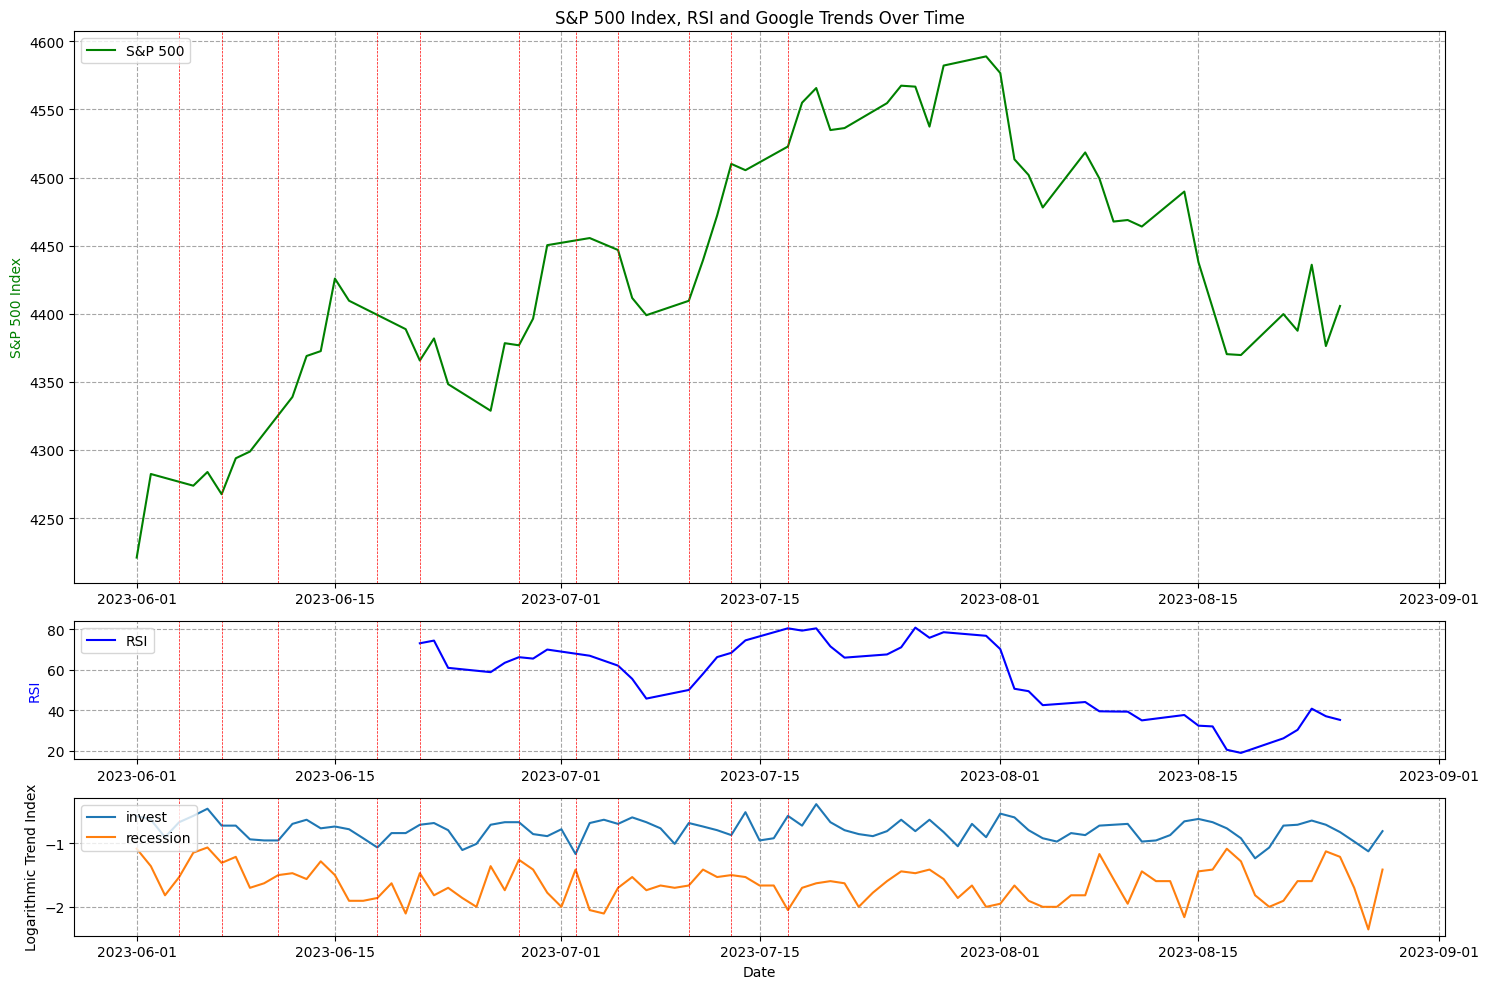

In [9]:
import pytrends as pt
from pytrends.request import TrendReq
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np

# Initialize the Google Trends object
pytrends = TrendReq()

# Set the keywords to search for
keywords = ["invest", "recession"]

# Set the timeframe for the search to the past 5 years
timeframe = "today 3-m"

# Build the payload with the keywords and timeframe
pytrends.build_payload(kw_list=keywords, timeframe=timeframe, geo="US-CA")

# Get the interest over time data for the keywords
interest_over_time = pytrends.interest_over_time()

# Convert the Trends data to logarithmic scale and phase to the lower half of the graph
for keyword in keywords:
    interest_over_time[keyword] = np.log1p(interest_over_time[keyword]) - 5

# Fetch the S&P 500 data for the last 5 years
sp500_data = yf.download('^GSPC', start=interest_over_time.index.min(), end=interest_over_time.index.max())


# SECCION PLOTTING

# Compute RSI
def compute_rsi(data, window):
    delta = data.diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

rsi_data = compute_rsi(sp500_data["Close"], window=14)

# Create a figure with custom height ratio
fig = plt.figure(figsize=(15, 10))
gs = gridspec.GridSpec(3, 1, height_ratios=[4, 1, 1])

# Plot the S&P 500 data on the top subplot
ax1 = plt.subplot(gs[0])
ax1.plot(sp500_data.index, sp500_data["Close"], 'g-', label="S&P 500")
ax1.set_ylabel('S&P 500 Index', color='g')
ax1.set_title('S&P 500 Index, RSI and Google Trends Over Time')
ax1.legend(loc="upper left")
ax1.grid(True, which="both", ls="--", c='0.65')

# Plot RSI data on the middle subplot
ax3 = plt.subplot(gs[1], sharex=ax1)
ax3.plot(rsi_data.index, rsi_data, 'b-', label="RSI")
ax3.set_ylabel('RSI', color='b')
ax3.legend(loc="upper left")
ax3.grid(True, which="both", ls="--", c='0.65')

# Plot Google Trends data on the bottom subplot
ax2 = plt.subplot(gs[2], sharex=ax1)
for keyword in keywords:
    ax2.plot(interest_over_time.index, interest_over_time[keyword], label=keyword)

# Add thin red vertical lines at local maxima
for date, is_max in zip(interest_over_time.index, local_maxima):
    if is_max:
        ax1.axvline(date, color='r', linestyle='--', linewidth=0.5)
        ax2.axvline(date, color='r', linestyle='--', linewidth=0.5)
        ax3.axvline(date, color='r', linestyle='--', linewidth=0.5, label='Local Max')

ax2.set_xlabel('Date')
ax2.set_ylabel('Logarithmic Trend Index')
ax2.legend(loc="upper left")
ax2.grid(True, which="both", ls="--", c='0.65')

# Adjust the layout
plt.tight_layout()
plt.show()



[*********************100%%**********************]  1 of 1 completed


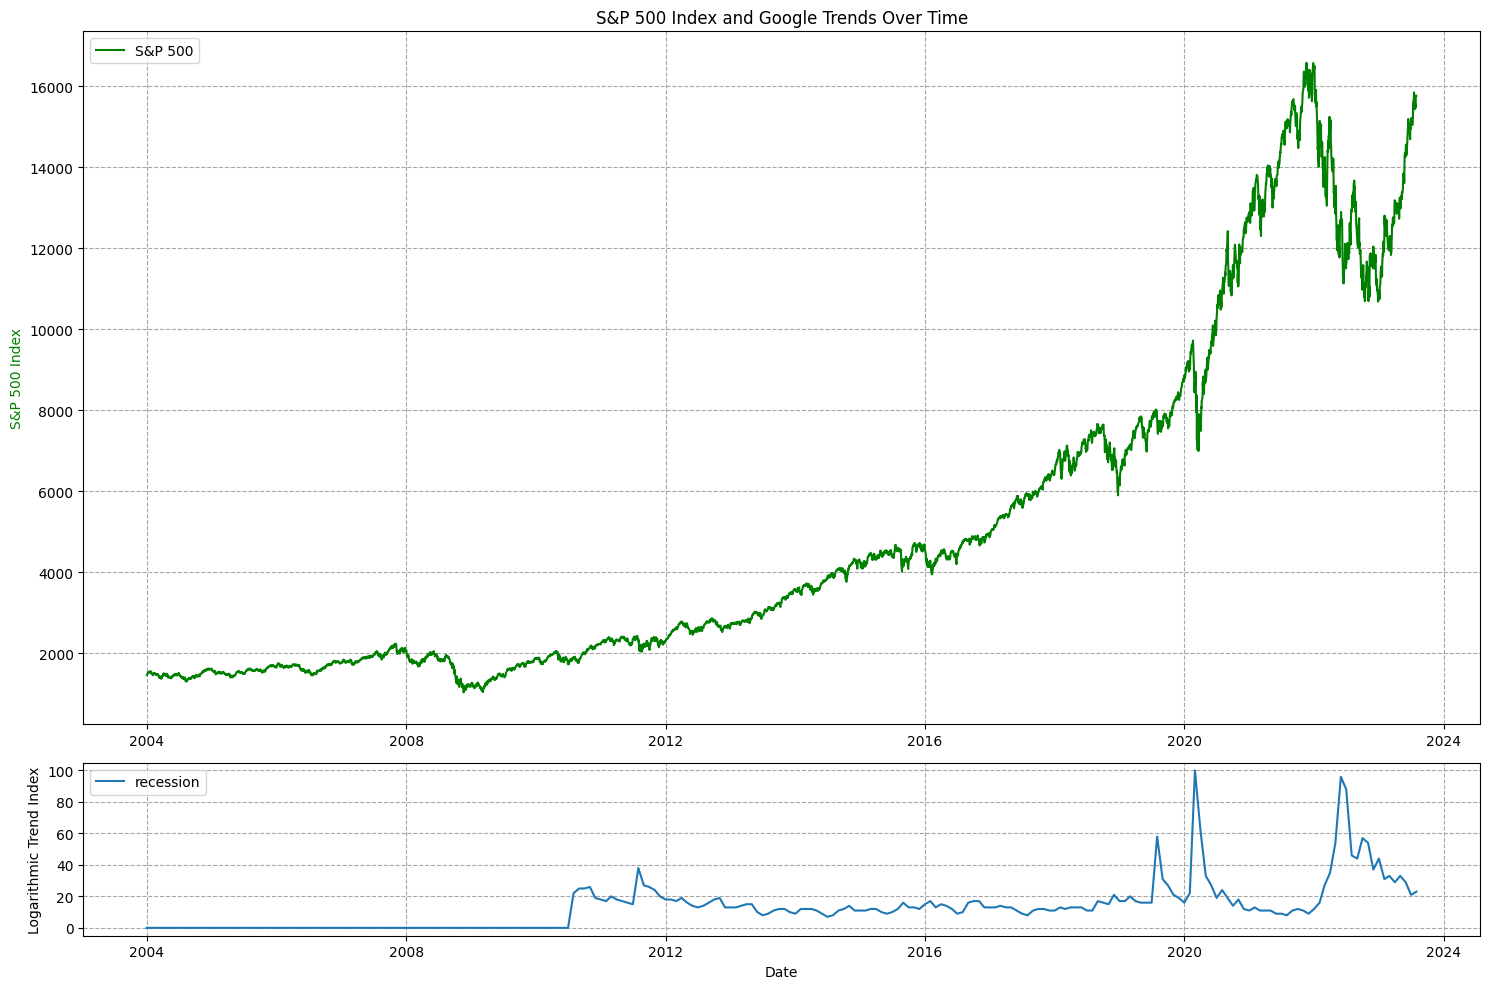

In [15]:
import pytrends as pt
from pytrends.request import TrendReq
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.gridspec as gridspec

# Initialize the Google Trends object
pytrends = TrendReq()

# Set the keywords to search for
keywords = ["recession"]

# Set the timeframe for the search to "all"
timeframe = "all"

# Build the payload with the keywords and timeframe
pytrends.build_payload(kw_list=keywords, timeframe=timeframe)

# Get the interest over time data for the keywords
interest_over_time = pytrends.interest_over_time()

# Convert the Trends data to logarithmic scale
#for keyword in keywords:
    #interest_over_time[keyword] = np.log1p(interest_over_time[keyword])

# Fetch the S&P 500 data for the duration
sp500_data = yf.download('^NDX', start=interest_over_time.index.min(), end=interest_over_time.index.max())

# Create a figure with custom height ratio
fig = plt.figure(figsize=(15, 10))
gs = gridspec.GridSpec(2, 1, height_ratios=[4, 1])

# Plot the S&P 500 data on the top subplot
ax1 = plt.subplot(gs[0])
ax1.plot(sp500_data.index, sp500_data["Close"], 'g-', label="S&P 500")
ax1.set_ylabel('S&P 500 Index', color='g')
ax1.set_title('S&P 500 Index and Google Trends Over Time')
ax1.legend(loc="upper left")
ax1.grid(True, which="both", ls="--", c='0.65')

# Plot Google Trends data on the bottom subplot
ax2 = plt.subplot(gs[1], sharex=ax1)
for keyword in keywords:
    ax2.plot(interest_over_time.index, interest_over_time[keyword], label=keyword)
ax2.set_xlabel('Date')
ax2.set_ylabel('Logarithmic Trend Index')
ax2.legend(loc="upper left")
ax2.grid(True, which="both", ls="--", c='0.65')

# Adjust the layout
plt.tight_layout()
plt.show()


[*********************100%%**********************]  1 of 1 completed


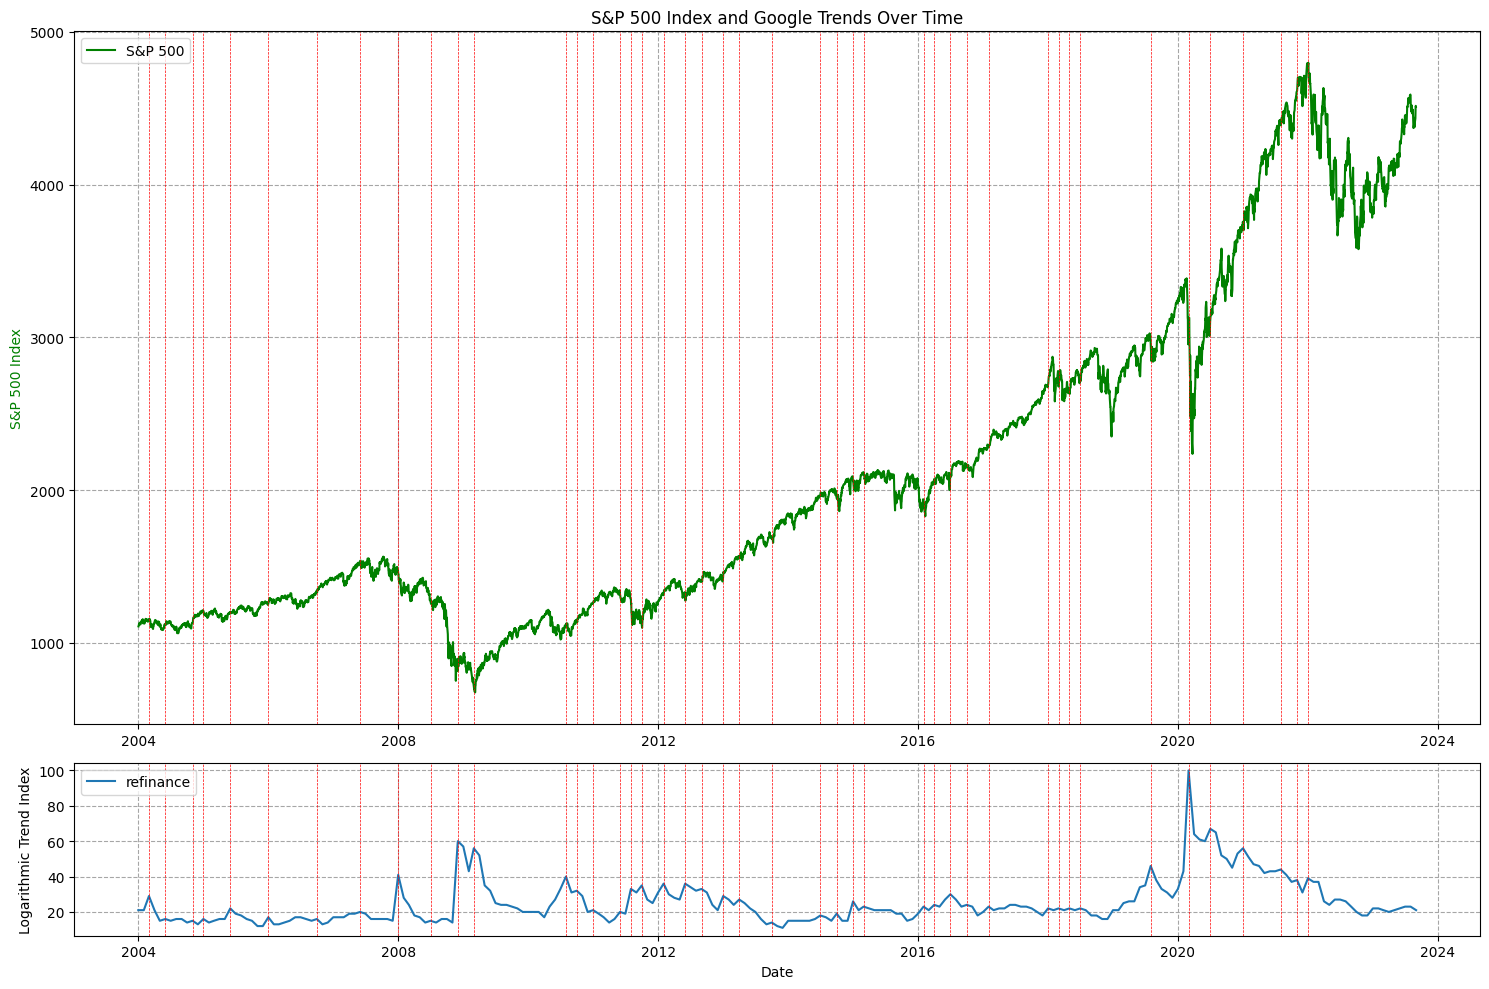

In [2]:
import pytrends as pt
from pytrends.request import TrendReq
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.gridspec as gridspec

# Initialize the Google Trends object
pytrends = TrendReq()

# Set the keywords to search for
keywords = ["refinance"]

# Set the time,"frame for the search to "all"
timeframe = "all"

# Build the payload with the keywords and timeframe
pytrends.build_payload(kw_list=keywords, timeframe=timeframe,geo="US")

# Get the interest over time data for the keywords
interest_over_time = pytrends.interest_over_time()

# Convert the Trends data to logarithmic scale
#for keyword in keywords:
#    interest_over_time[keyword] = np.log1p(interest_over_time[keyword])

# Fetch the S&P 500 data for the duration
sp500_data = yf.download('^SPX', start=interest_over_time.index.min(), end=interest_over_time.index.max())

# Create a figure with custom height ratio
fig = plt.figure(figsize=(15, 10))
gs = gridspec.GridSpec(2, 1, height_ratios=[4, 1])

# Plot the S&P 500 data on the top subplot
ax1 = plt.subplot(gs[0])
ax1.plot(sp500_data.index, sp500_data["Close"], 'g-', label="S&P 500")
ax1.set_ylabel('S&P 500 Index', color='g')
ax1.set_title('S&P 500 Index and Google Trends Over Time')
ax1.legend(loc="upper left")
ax1.grid(True, which="both", ls="--", c='0.65')


# Find local maxima
# Compare each point with its neighbors
local_maxima = (interest_over_time[keywords[0]] > interest_over_time[keywords[0]].shift(1)) & \
               (interest_over_time[keywords[0]] > interest_over_time[keywords[0]].shift(-1))

# Plot Google Trends data on the bottom subplot
ax2 = plt.subplot(gs[1], sharex=ax1)
for keyword in keywords:
    ax2.plot(interest_over_time.index, interest_over_time[keyword], label=keyword)

# Add thin red vertical lines at local maxima
for date, is_max in zip(interest_over_time.index, local_maxima):
    if is_max:
        ax1.axvline(date, color='r', linestyle='--', linewidth=0.5)
        ax2.axvline(date, color='r', linestyle='--', linewidth=0.5)

ax2.set_xlabel('Date')
ax2.set_ylabel('Search Trend Index')
ax2.legend(loc="upper left")
ax2.grid(True, which="both", ls="--", c='0.65')

# Adjust the layout
plt.tight_layout()
plt.show()




[*********************100%%**********************]  1 of 1 completed


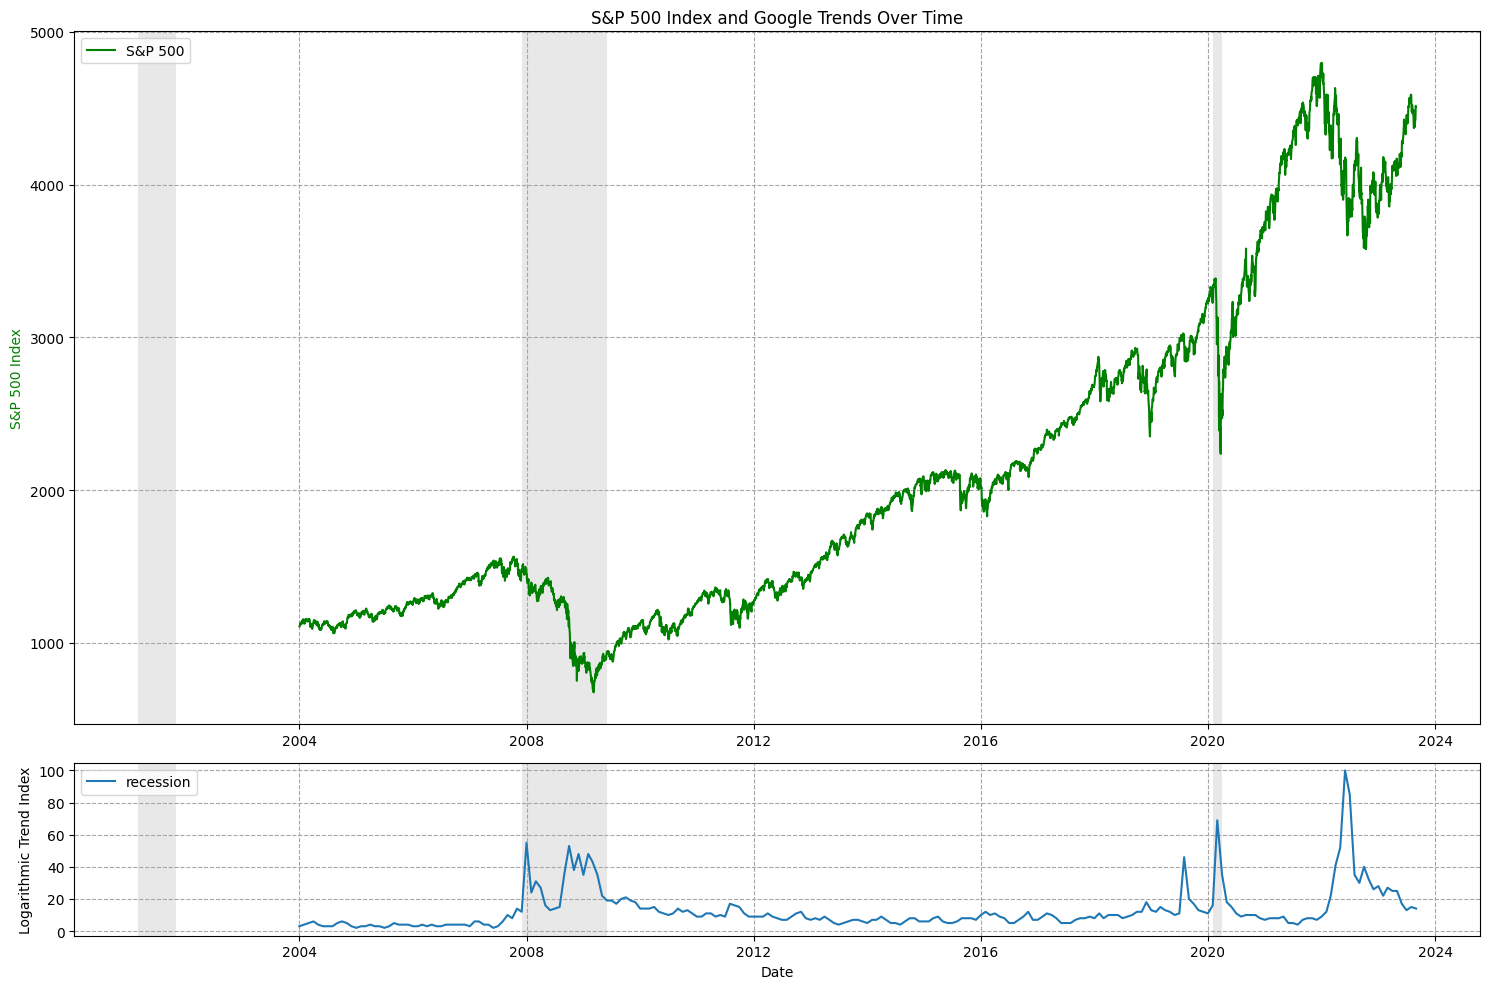

In [16]:
import pytrends as pt
from pytrends.request import TrendReq
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.gridspec as gridspec

# Initialize the Google Trends object
pytrends = TrendReq()

# Set the keywords to search for
keywords = ["recession"]

# Set the time,"frame for the search to "all"
timeframe = "all"

# Build the payload with the keywords and timeframe
pytrends.build_payload(kw_list=keywords, timeframe=timeframe,geo="US")

# Get the interest over time data for the keywords
interest_over_time = pytrends.interest_over_time()

# Convert the Trends data to logarithmic scale
#for keyword in keywords:
#    interest_over_time[keyword] = np.log1p(interest_over_time[keyword])

# ... (Previous code)

# Fetch the S&P 500 data for the duration
sp500_data = yf.download('^SPX', start=interest_over_time.index.min(), end=interest_over_time.index.max())

# Create a figure with custom height ratio
fig = plt.figure(figsize=(15, 10))
gs = gridspec.GridSpec(2, 1, height_ratios=[4, 1])

# Plot the S&P 500 data on the top subplot
ax1 = plt.subplot(gs[0])
ax1.plot(sp500_data.index, sp500_data["Close"], 'g-', label="S&P 500")
ax1.set_ylabel('S&P 500 Index', color='g')
ax1.set_title('S&P 500 Index and Google Trends Over Time')
ax1.legend(loc="upper left")
ax1.grid(True, which="both", ls="--", c='0.65')

# Find local maxima
# Compare each point with its neighbors
local_maxima = (interest_over_time[keywords[0]] > interest_over_time[keywords[0]].shift(1)) & \
               (interest_over_time[keywords[0]] > interest_over_time[keywords[0]].shift(-1))

# Plot Google Trends data on the bottom subplot
ax2 = plt.subplot(gs[1], sharex=ax1)
for keyword in keywords:
    ax2.plot(interest_over_time.index, interest_over_time[keyword], label=keyword)

# Add thin red vertical lines at local maxima
#for date, is_max in zip(interest_over_time.index, local_maxima):
#    if is_max:
#        ax1.axvline(date, color='r', linestyle='--', linewidth=0.5)
#        ax2.axvline(date, color='r', linestyle='--', linewidth=0.5)

# Define recession periods (you can modify this list with your own recession dates)
recession_periods = [
    ('2001-03-01', '2001-11-01'),  # Example: Recession period 1
    ('2007-12-01', '2009-06-01'),  # Example: Recession period 2
    ('2020-02-01', '2020-04-01'),  # Example: Recession period 2
]


# Add light grey vertical bands for recession periods
for start_date, end_date in recession_periods:
    ax1.axvspan(start_date, end_date, facecolor='lightgrey', alpha=0.5)
    ax2.axvspan(start_date, end_date, facecolor='lightgrey', alpha=0.5)

ax2.set_xlabel('Date')
ax2.set_ylabel('Logarithmic Trend Index')
ax2.legend(loc="upper left")
ax2.grid(True, which="both", ls="--", c='0.65')

# Adjust the layout
plt.tight_layout()
plt.show()
